<a href="https://colab.research.google.com/github/AlyssaAmod/UNN_BraTS23/blob/main/Augmentations_Efficient_AAupdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install synapseclient

Note: you may need to restart the kernel to use updated packages.


# Validation segmentations

In [2]:
import synapseclient
import zipfile
import os
import random
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch
# !pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

In [3]:
syn = synapseclient.Synapse()
syn.login(email='amodar7@gmail.com', password='VidaPhone17')
val = syn.get("syn52045895")

VAL_path = val.path

specific_string = "BraTS-"


UPGRADE AVAILABLE

A more recent version of the Synapse Client (3.0.0) is available. Your version (2.7.2) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 3.0.0 release notes

https://python-docs.synapse.org/build/html/news.html

[WARNING] Logging into Synapse via passwords will be deprecated by early 2024. This message will disappear if you use a Synapse Personal Access Token to login.


Welcome, amodar7@gmail.com!



In [5]:
print(VAL_path)

c:\users\amoda\.synapsecache\704\126867704\asnr-miccai-brats2023-ssa-challenge-validationdata.zip


In [4]:
val = syn.get("syn52045895")
VAL_path = val.path

print(VAL_path)

VAL_dir = "/content/val_orig"

if not os.path.exists(VAL_dir):
    os.mkdir(VAL_dir)

with zipfile.ZipFile(VAL_path, 'r') as zip_ref:
    zip_ref.extractall(VAL_dir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/sample_data/VAL_'

In [10]:
# Model: train_SSA
train_ssa4f = syn.get("syn52280447")
train_ssa4f_path = train_ssa4f.path
train_ssa4f_dir = "/content/predictions/train_ssa4f"
if not os.path.exists(train_ssa4f_dir):
    os.mkdir(train_ssa4f_dir)
with zipfile.ZipFile(train_ssa4f_path, 'r') as zip_ref:
    zip_ref.extractall(train_ssa4f_dir)

train_ssa5f = syn.get("syn52958207")
train_ssa5f_path = train_ssa5f.path
train_ssa5f_dir = "/content/predictions/train_ssa5f"
if not os.path.exists(train_ssa5f_dir):
    os.mkdir(train_ssa5f_dir)
with zipfile.ZipFile(train_ssa5f_path, 'r') as zip_ref:
    zip_ref.extractall(train_ssa5f_dir)

# Model: train_all
train_all75 = syn.get("syn52257546")
train_all75_path = train_all75.path
train_all75_dir = "/content/predictions/train_all75"
if not os.path.exists(train_all75_dir):
    os.mkdir(train_all75_dir)
with zipfile.ZipFile(train_all75_path, 'r') as zip_ref:
    zip_ref.extractall(train_all75_dir)

train_all100 = syn.get("syn52301709")
train_all100_path = train_all100.path
train_all100_dir = "/content/predictions/train_all100"
if not os.path.exists(train_all100_dir):
    os.mkdir(train_all100_dir)
with zipfile.ZipFile(train_all100_path, 'r') as zip_ref:
    zip_ref.extractall(train_all100_dir)

# Model: train_gli
train_gli = syn.get("syn52266215")
train_gli_path = train_gli.path
train_gli_dir = "/content/predictions/train_gli"
if not os.path.exists(train_gli_dir):
    os.mkdir(train_gli_dir)
with zipfile.ZipFile(train_gli_path, 'r') as zip_ref:
    zip_ref.extractall(train_gli_dir)

# Model: GLIftSSA
train_ftssa4f = syn.get("syn52280523")
train_ftssa4f_path = train_ftssa4f.path
train_ftssa4f_dir = "/content/predictions/ftssa4f"
if not os.path.exists(train_ftssa4f_dir):
    os.mkdir(train_ftssa4f_dir)
with zipfile.ZipFile(train_ftssa4f_path, 'r') as zip_ref:
    zip_ref.extractall(train_ftssa4f_dir)

# train_ftssa5f = syn.get("")
# train_ftssa5f_path = train_ftssa5f.path
# train_ftssa5f_dir = "/content/predictions/ftssa5f"
# if not os.path.exists(train_ftssa5f_dir):
#     os.mkdir(train_ftssa5f_dir)
# with zipfile.ZipFile(train_ftssa5f_path, 'r') as zip_ref:
#     zip_ref.extractall(train_ftssa5f_dir)


outfile = '/content/visuals'
if not os.path.exists(outfile):
    os.mkdir(outfile)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random
from matplotlib.colors import ListedColormap
import torch
import json
from glob import glob
import time
import random
import numpy as np
from matplotlib import rcParams
import torchio as tio

['train_ssa', 'train_all', 'train_gli', 'train_ftSSA']: D:\CourseStuff\SPARK\BraTS2023\results\train_ssa\ssa_all\final_preds5folds
D:\CourseStuff\SPARK\BraTS2023\results\train_all\final_preds100
D:\CourseStuff\SPARK\BraTS2023\results\train_gli\val_predictions\final_preds_ssa
D:\CourseStuff\SPARK\BraTS2023\results\train_gli\val_predictions\final_predsftSSA_4Folds
(240, 240, 155) (240, 240, 155)
(240, 240, 155) (240, 240, 155)
(240, 240, 155) (240, 240, 155)
(240, 240, 155) (240, 240, 155)


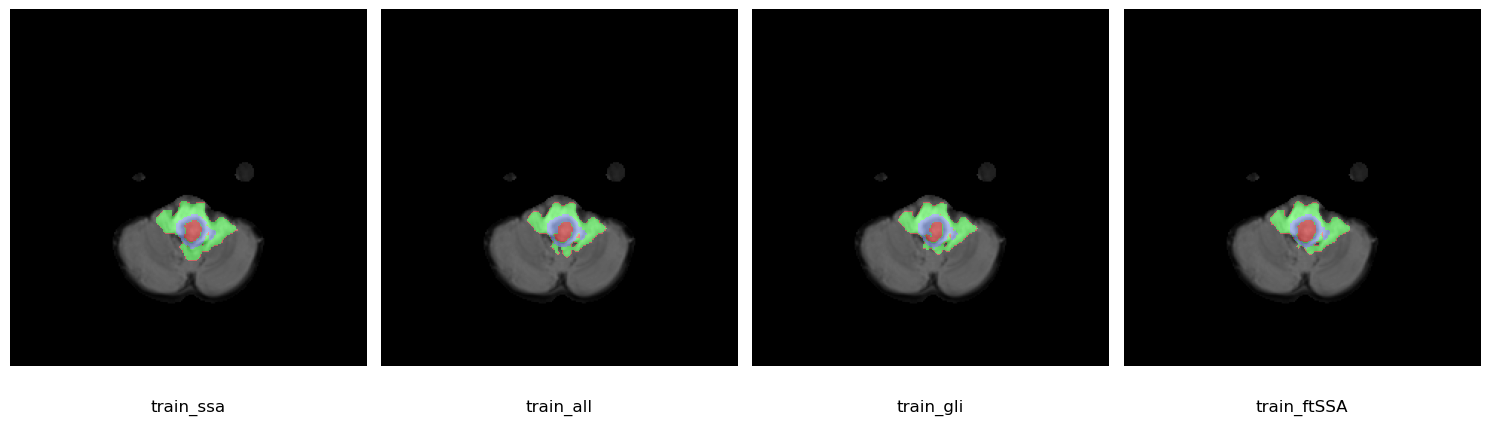

In [19]:
def flip(x):
    return np.rot90(x)
def flip2(x):
    return flip(flip(x))
to_ras = tio.ToCanonical()

dir = 'ASNR-MICCAI-BraTS2023-SSA-Challenge-ValidationData'
orig_data_pth = os.path.join(VAL_dir, dir)

model_name = ["train_ssa4f", "train_ssa5f", "train_all75", "train_all100", "train_gli", "train_ftssa"]
seg_data_dir = [train_ssa4f_dir, train_ssa5f_dir, train_all75_dir, train_all100_dir, train_gli_dir, train_ftssa4f_dir]

ax_slices, cor_slices, sag_slices, ax_lbls, cor_lbls, sag_lbls= [],[],[],[],[],[]
views = [ax_slices, cor_slices, sag_slices]
labels = [ax_lbls,cor_lbls,sag_lbls]
plane = ["axial","coronal","sagittal"]

# Choose subject
subject_id = 'BraTS-SSA-00143-000'

# Choose coordinates
slice_num_a=80
slice_num_c=124
slice_num_s=110

# Choose the volume to be used (0: "t1c", 1: "t1n", 2: "t2f", 3: "t2w")
selected_volume_index = 0

# Load image volumes


for pth in range(len(seg_data_dir)):
    img_volumes = [nib.load(os.path.join(os.path.join(orig_data_pth, subject_id), subject_id + f"-{m}.nii.gz")) for m in ["t1c", "t1n", "t2f", "t2w"]]
    img_volumes = [to_ras(img_volumes[i]) for i in range(len(img_volumes))]
    imgs1 = [img_volumes[i].get_fdata().astype(np.float32) for i in range(len(img_volumes))]

    ax_slices.append(imgs1[selected_volume_index][:, :, slice_num_a])
    cor_slices.append(imgs1[selected_volume_index][slice_num_c, :, :])
    sag_slices.append(imgs1[selected_volume_index][:, slice_num_s, :])
    # Load segmentation volume
    seg_volume = nib.load(os.path.join(f"{seg_data_dir[pth]}", subject_id + ".nii.gz"))

    # Extract slices
    lbl1 = seg_volume.get_fdata().astype(np.float32)
    print(imgs1[selected_volume_index].shape, lbl1.shape)
    ax_lbls.append(lbl1[:, :, slice_num_a])
    cor_lbls.append(lbl1[slice_num_c, :, :])
    sag_lbls.append(lbl1[:, slice_num_s, :])

colours = ['black', 'red', 'lime', 'royalblue']
cmap = ListedColormap(colours)
fig1, axs1 = plt.subplots(nrows=1, ncols=3, figsize=(10,6))
for n, ax1 in enumerate(axs1.ravel()):
    ax1.imshow(flip(views[n][0]), cmap="gray")
plt.tight_layout()
# plt.subplots_adjust(wspace=0)
plt.show()
for v, view in enumerate(views):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
    for x, ax in enumerate(axs.ravel()):
        ax.imshow(flip(view[v]), cmap="gray")
        ax.imshow(flip(labels[v][x]), cmap=cmap, alpha=0.4)
        ax.set_title(model_name[x], y=-0.15); ax.axis('off')
    # plt.suptitle("Subject 3")
    plt.tight_layout()
    # plt.subplots_adjust(wspace=0)
    plt.savefig(os.path.join(outfile, f'{subject_id}_{plane[v]}_t1c.png'), bbox_inches='tight')
    plt.show()


TypeError: Invalid shape (240, 240, 155) for image data

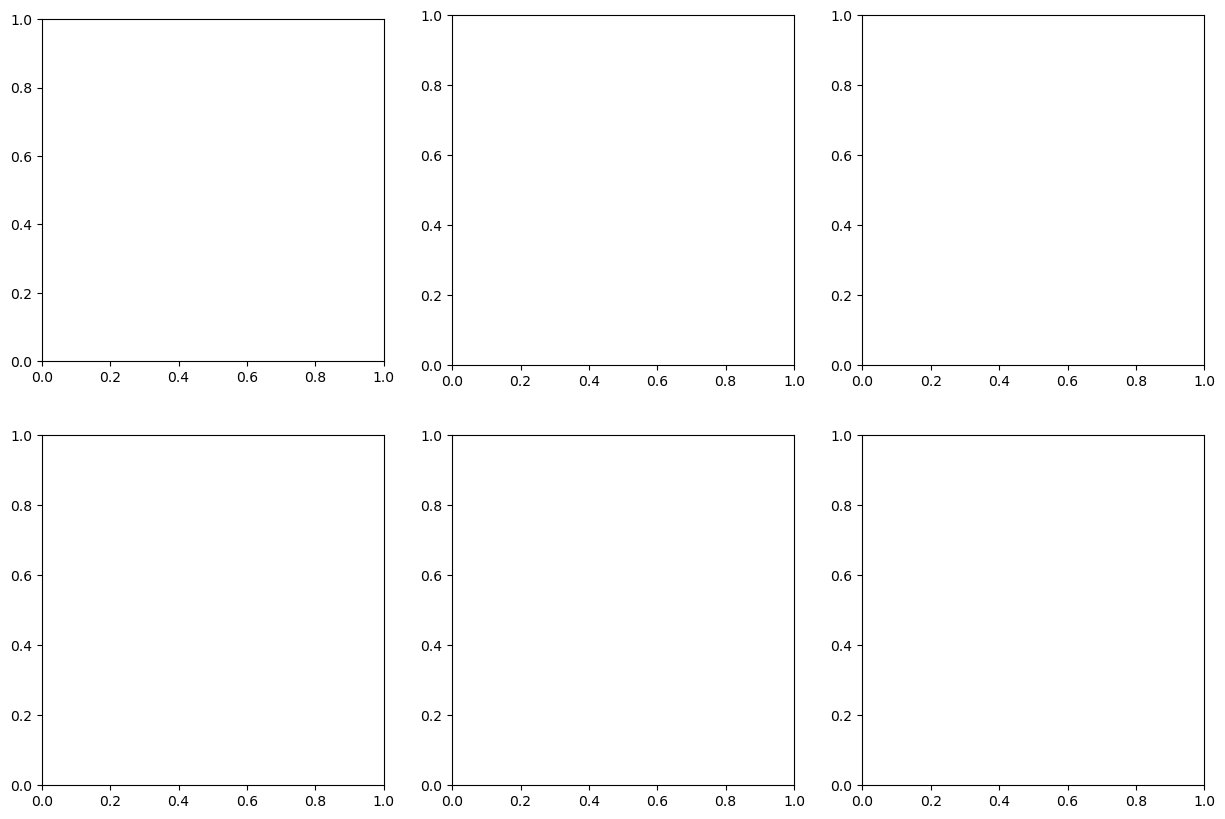

In [20]:
# Choose the volume to be used (0: "t1n", 1: "t1c", 2: "t2w", 3: "t2f")
selected_volume_index = 3

slice_num_a = 76
slice_num_c = 76
slice_num_s = 108

for pth in range(len(seg_data_dir)):
    # Load image volumes
    img_volumes = [nib.load(os.path.join(os.path.join(VAL_data_dir, subject_id), subject_id + f"-{m}.nii.gz")) for m in ["t1n", "t1c", "t2w", "t2f"]]
    img_volumes = [to_ras(img_volumes[selected_volume_index])]
    # Load segmentation volume
    seg_volume = nib.load(os.path.join(f"{seg_data_dir[pth]}", subject_id + ".nii.gz"))

    # Extract data from volumes
    img = img_volumes[0].get_fdata().astype(np.float32)
    lbl1 = seg_volume.get_fdata().astype(np.float32)

    # Extract slices from specific vol
    axial_slice = img[:, :, slice_num_a]
    coronal_slice = img[:, slice_num_c, :]
    sagittal_slice = img[slice_num_s, :, :]

    lbl_axial = lbl1[:, :, slice_num_a]
    lbl_coronal = lbl1[:, slice_num_c, :]
    lbl_sagittal = lbl1[slice_num_s, :, :]

    slices = [axial_slice, coronal_slice, sagittal_slice]
    # Display each plane in a new row
    colours = ['black', 'red', 'lime', 'royalblue']
    cmap = ListedColormap(colours)
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Original volume without overlay
    axs[0, 0].imshow(flip(img), cmap="gray")
    axs[0, 0].set_title(f"{model_name[pth]}", y=-0.15, color='black')
    axs[0, 0].axis('off')

    # Axial view
    axs[0, 1].imshow(flip(axial_slice), cmap="gray")
    axs[0, 1].imshow(flip(lbl_axial), cmap=cmap, alpha=0.4)
    axs[0, 1].set_title(f"Axial", y=-0.15, color='black')
    axs[0, 1].axis('off')
    axs[0, 1].text(1.0, 1.0, 'Axial', color='white', horizontalalignment='right', verticalalignment='top', transform=axs[0, 1].transAxes)

    # Coronal view
    axs[0, 2].imshow(flip(coronal_slice), cmap="gray")
    axs[0, 2].imshow(flip(lbl_coronal), cmap=cmap, alpha=0.4)
    axs[0, 2].set_title(f"Coronal", y=-0.15, color='black')
    axs[0, 2].axis('off')
    axs[0, 2].text(1.0, 1.0, 'Coronal', color='white', horizontalalignment='right', verticalalignment='top', transform=axs[0, 2].transAxes)

    # Sagittal view
    axs[1, 0].imshow(flip(sagittal_slice), cmap="gray")
    axs[1, 0].imshow(flip(lbl_sagittal), cmap=cmap, alpha=0.4)
    axs[1, 0].set_title(f"Sagittal", y=-0.15, color='black')
    axs[1, 0].axis('off')
    axs[1, 0].text(1.0, 1.0, 'Sagittal', color='white', horizontalalignment='right', verticalalignment='top', transform=axs[1, 0].transAxes)

    plt.suptitle(f"{subject_id} - {model_name[pth]}", color='black')
    plt.tight_layout()
    plt.savefig(os.path.join(outfile, f'{subject_id}_{model_name[pth]}_all_views.png'), bbox_inches='tight')
    plt.show()